[View in Colaboratory](https://colab.research.google.com/github/sungreong/TIL/blob/master/NonParametric_Homework1.ipynb)

# $$ f(x) = \frac{1}{2} \phi(x-2)+ \frac{1}{2} \phi(x+2)$$

* simulate a sample of size n = 200 from this density.
* Compare visullay and giva a ranking of the following estimates of the density

In [193]:
import numpy as np
from scipy.stats import norm
from scipy.stats import *
import pandas as pd


200

Comment 
*  Normal 분포와 epanechnikov  함수를 만들어서 구현했습니다.
* Higher_order 를  26pg  mehtod 2번 방법을 이용해서 구현해봤습니다.

$$ log(f ( x_i ;  \mu , \sigma ^2 ))  = -\frac{n}{2}log(2\pi) - \frac{n}{2}log(\sigma^2) - \frac{1}{2\sigma^2}\sum(x_i - \mu)^2$$
$ N(\mu , \sigma^2 ) $ 라 가정을 하고 Parametric estimator 를 추정하자

추가적으로 추정치에 대한 estimator도 같이 진행해보았습니다.


Normal로 가정하고 추정하였을 때 값
mu_estimator :  0.11423260260475403 sd_estimator :  2.2265809262518546


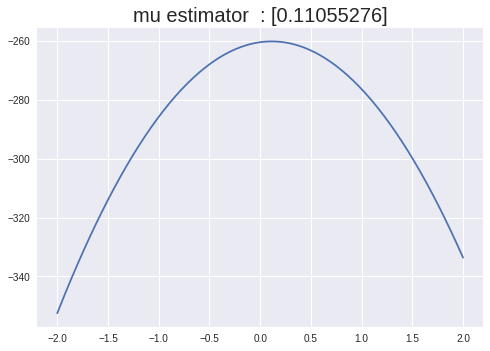

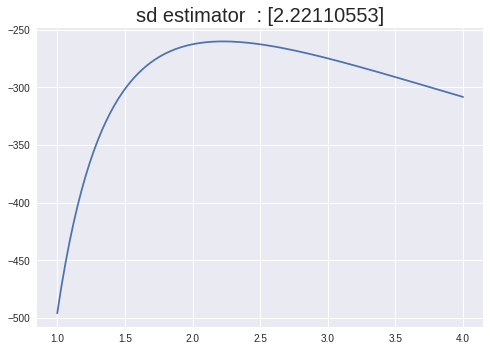

In [74]:
a = norm.fit(gmm)
print("Normal로 가정하고 추정하였을 때 값")
print( "mu_estimator : " , a[0] , "sd_estimator : " , a[1])


j = 2.2 
x = np.linspace(-2, 2, 200) 
y= [-len(gmm)/2*np.log(np.square(j) )-1/(2*np.square(j))*np.sum( np.square(gmm- i ) ) for i in x ]
plt.plot(x, y )
plt.title( "mu estimator  : " + str( x[np.where(y  == np.max(y))] ) , fontsize= 20)
plt.show()
i = 0.11
x = np.linspace(1, 4, 200) 
y= [-len(gmm)/2*np.log(np.square(j) )-1/(2*np.square(j))*np.sum( np.square(gmm- i ) ) for j in x ]
plt.plot(x, y )
plt.title("sd estimator  : " + str( x[np.where(y  == np.max(y))] ) , fontsize= 20 )
plt.show()

## Histogram 그리기
* 저번에 과제를 했을 때 분포를 잘 못 구해서 다시 수정하였습니다.

(array([ 5., 19., 27., 40., 10., 17., 26., 43., 11.,  2.]),
 array([-4.55944898, -3.63065395, -2.70185892, -1.77306389, -0.84426886,
         0.08452617,  1.01332119,  1.94211622,  2.87091125,  3.79970628,
         4.72850131]),
 <a list of 10 Patch objects>)

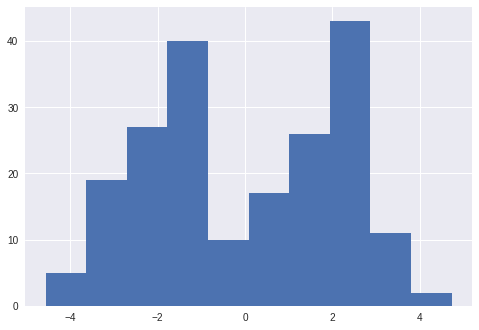

In [103]:
import matplotlib.pyplot as plt
X = np.random.choice( [ 0 , 1 ] , size= 200 , p =[0.5, 0.5])
count = np.bincount(X)
a= np.random.normal(loc = -2.0, scale = 1.0 , size= count[0] )
b = np.random.normal(loc = 2.0 ,scale = 1.0 , size = count[1])
gmm = np.append(a , b)
plt.hist(gmm  )

## 3. Kernel Density with at least two kernels and a few different bandwidhts

###  comment 
* 실제로 구현한 함수로 Kernel Density를 그려보았습니다.
* kernel 은 Gaussian 과 Epanechnikov 를 사용했습니다. 
* bandiwidth [0.5 0.7 .09]  를 사용하였습니다.
* 실제로 그림을 확인을 해보니 Kernel 보다는 BandWidth에 영향을 많이 받는 다는 사실을 알게 되었습니다.

In [0]:

def gaussian(x, h = None):
    matrix = norm.pdf( (x[:, None] - x[None, :]) / h  , loc = 0 ,scale = 1)  / h
    f_hat = np.mean( matrix , axis =  1 ) 
    output = pd.DataFrame({"x" :  x , "f_hat" : f_hat} , columns = ["x", "f_hat"]).sort_values("x")
    return output.f_hat.values


def epan( x = None , h =  None ) :
    M  =  x[:, None] - x[None, :] 
    M  = M / h 
    index = (M >= -1 )& (M <= 1)
    condition1 = index
    condition2 = np.invert(index)
    M[ condition1 ] = 0.75*(1- np.square(M[condition1] ))  / h 
    M[ condition2 ] = 0
    f_hat = np.mean( M , axis =  1 )
    output = pd.DataFrame({"x" :  x , "f_hat" : f_hat} , columns = ["x", "f_hat"]).sort_values("x")
    return output.f_hat.values

    

Text(0.5,1,'Epanechnikov  h = 0.09  ')

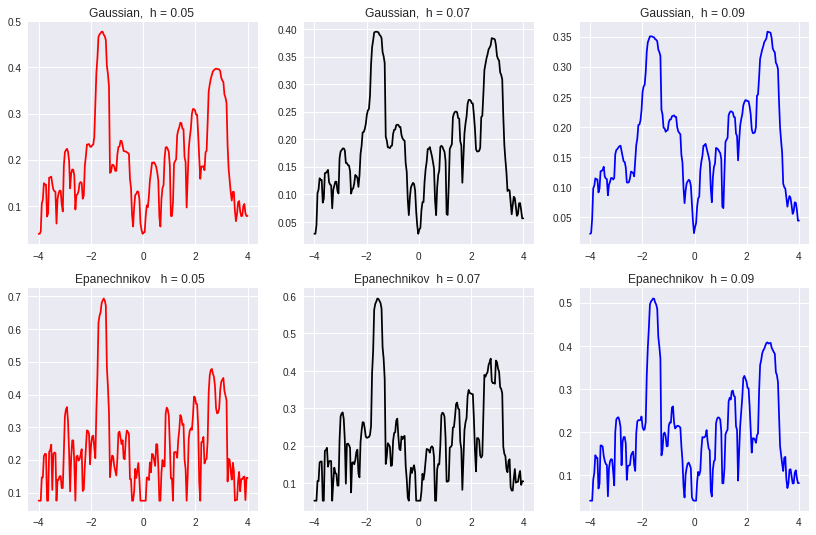

In [189]:
import numpy as np
import matplotlib.pyplot as plt
#Let's take any value
X=gmm
# Plot all available kernels
x_ = np.linspace(-4, 4, 200)
fig = plt.figure( figsize = (14, 9))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)


ax1.plot( x_ , gaussian( X , h = 0.05) , "r" )
ax1.set_title("Gaussian,  h = 0.05 ")
ax2.plot( x_ , gaussian( X , h = 0.07) , "k" )
ax2.set_title( "Gaussian,  h = 0.07 ")
ax3.plot( x_ , gaussian( X , h = 0.09) , "b" )
ax3.set_title( "Gaussian,  h = 0.09 ")



ax4.plot( x_ , epan(X, h = 0.05) , "r")
ax4.set_title( "Epanechnikov   h = 0.05  ")
ax5.plot( x_ ,  epan(X, h = 0.07), "k")
ax5.set_title(  "Epanechnikov  h = 0.07 ")
ax6.plot( x_ , epan(X, h = 0.09) , "b")
ax6.set_title(  "Epanechnikov  h = 0.09  ")


## Seaborn에 있는 패키지를 활용해 Gaussian 과 Epanechnikov를 이용한 Kernel Density를 해봤습니다.

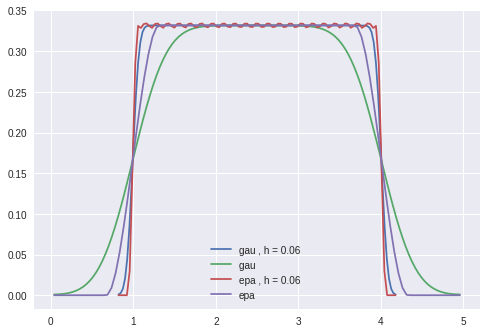

In [147]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
import seaborn as sns

sns.kdeplot(x  , bw= 0.06 , kernel = "gau" , label ="gau , h = 0.06 ")
sns.kdeplot(x   , kernel = "gau", label ="gau ")
sns.kdeplot(x  , bw= 0.06 , kernel = "epa", label ="epa , h = 0.06")
sns.kdeplot(x   , kernel = "epa", label ="epa")
plt.legend()

# Higher Order Kerels
$$ Method 1 : K_{[l+2]}(x) = \frac{L+1}{L}K_{[l]}(x) + \frac{1}{l}xK^\prime(x) $$

$$ Method 2 : K_{[l+2]}(x) = 2K_{[l]}(x) -  K_{[l]}(x)  *  K_{[l]}(x)  $$ 

##  Comment
* 따로 함수를 찾지 못해서 26pg  Method 2 번 방법을 구현해봐서 해봤습니다.
* Bandwidth 을 더 작게 잡아야지 두 커널의 차이가 더 나는 것을 확인했습니다.

In [0]:
def higher_order( l , x ,  h = 1 , name = "None") :
    
    order = int( l / 2)-1
    if name == "Gaussian" :
        aa = gaussian(x, h  = h )
        for _ in np.arange(order) :
            aa = 2*aa - np.convolve(aa , aa , "same")
    elif name =="Epanechnikov" :
        aa = epan(x,  h =  h )
        for _ in np.arange(order) :
            aa = 2*aa - np.convolve(aa , aa , "same")    
    return aa
        

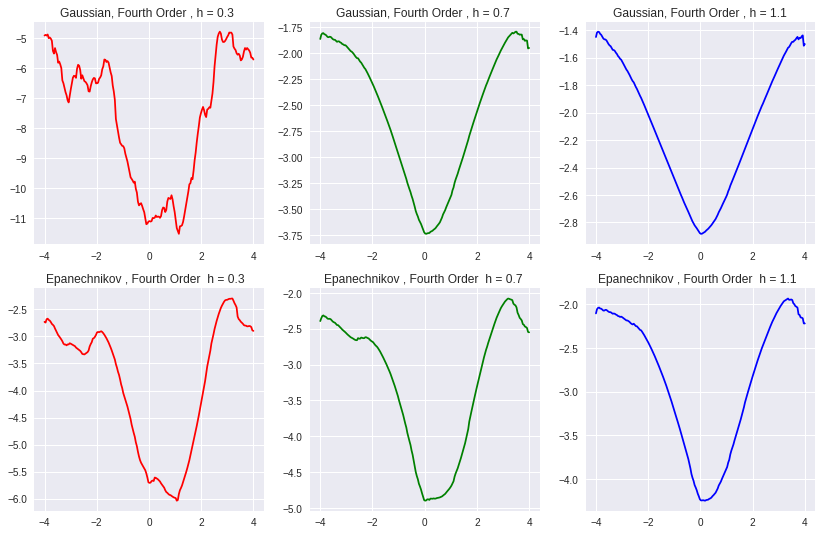

In [207]:


# Plot all available kernels
x = np.linspace(-4, 4, 200)
fig = plt.figure( figsize = (14, 9))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)



x0 = gmm 

gaus_x0_0_5 = higher_order( 4, x0 , h = 0.03 ,  name ="Gaussian" )
gaus_x0_1 = higher_order( 4, x0 , h =  0.7 ,  name ="Gaussian" )
gaus_x0_1_5 = higher_order( 4, x0 , h = 1.1 ,  name ="Gaussian" )
epane_x0_0_5 = higher_order( 4, x0 , h = 0.3 , name ="Epanechnikov" )
epane_x0_1 = higher_order( 4, x0 , h= 0.7 , name ="Epanechnikov" )
epane_x0_1_5 = higher_order( 4, x0 , h = 1.1 , name ="Epanechnikov" )



ax1.plot( x_ , gaus_x0_0_5 , "r" )
ax1.set_title( "Gaussian, Fourth Order , h = 0.3 ")
ax2.plot( x_ , gaus_x0_1  , "g" )
ax2.set_title(  "Gaussian, Fourth Order , h = 0.7 ")
ax3.plot( x_ , gaus_x0_1_5  , "b" )
ax3.set_title(  "Gaussian, Fourth Order , h = 1.1")



ax4.plot( x , epane_x0_0_5 , "r")
ax4.set_title(  "Epanechnikov , Fourth Order  h = 0.3  ")
ax5.plot( x , epane_x0_1  , "g")
ax5.set_title(  "Epanechnikov , Fourth Order  h = 0.7 ")
ax6.plot( x , epane_x0_1_5  , "b")
ax6.set_title(  "Epanechnikov , Fourth Order  h = 1.1  ")


plt.show()

## 6차 모멘트도 진행해봤습니다.

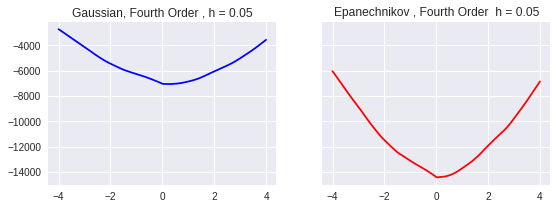

In [222]:
gaus_x0_6  = higher_order( 6, x0 , h = 0.05 ,  name ="Gaussian" )
epane_x0_6= higher_order( 6 , x0 , h = 0.05 , name ="Epanechnikov" )

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

axs[0].plot( x_ , gaus_x0_6  , "b" )
axs[0].set_title(  "Gaussian, Fourth Order , h = 0.05")
axs[1].plot( x , epane_x0_6 , "r")
axs[1].set_title(  "Epanechnikov , Fourth Order  h = 0.05")

plt.show()